<a href="https://colab.research.google.com/github/fran1215/MLAI/blob/main/W7_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
cd /content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05

/content/drive/MyDrive/Hands-On-Data-Analysis-with-Pandas-2nd-edition/ch_05


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

fb = pd.read_csv(
    'data/fb_stock_prices_2018.csv', index_col='date', parse_dates=True
)

In [4]:
fb.head()

,open,high,low,close,volume
date,,,,,
2018-01-02,177.68,181.58,177.5500,181.42,18151903
2018-01-03,181.88,184.78,181.3300,184.67,16886563
2018-01-04,184.90,186.21,184.0996,184.33,13880896
2018-01-05,185.59,186.90,184.9300,186.85,13574535
2018-01-08,187.20,188.90,186.3300,188.28,17994726


# Task 1

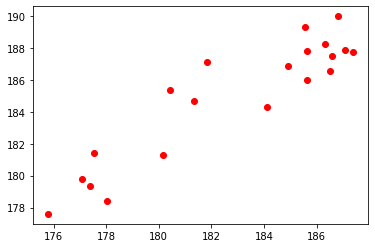

In [13]:
plt.plot('low', 'close', 'or', data=fb.head(20))

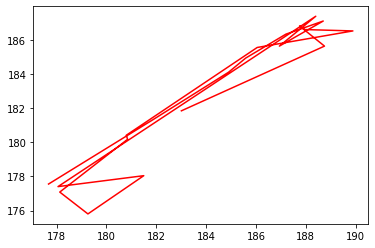

In [15]:
plt.plot('open', 'low', '-r', data=fb.head(20))

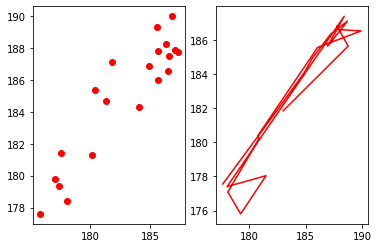

In [18]:
fig, axes = plt.subplots(1, 2)
axes[0].plot('low', 'close', 'or', data=fb.head(20))
axes[1].plot('open', 'low', '-r', data=fb.head(20))

# Task 2

In [19]:
quakes = pd.read_csv('data/earthquakes.csv')
covid = pd.read_csv('data/covid19_cases.csv').assign(
    date=lambda x: pd.to_datetime(x.dateRep, format='%d/%m/%Y')
).set_index('date').replace(
    'United_States_of_America', 'USA'
).sort_index()['2020-01-18':'2020-09-18']

In [33]:
new_cases_rolling_average = covid.pivot_table(
    index=covid.index, 
    columns='countriesAndTerritories', 
    values='cases'
).rolling(7).mean()
covid.countriesAndTerritories

date
2020-01-18           Croatia
2020-01-18            Greece
2020-01-18    United_Kingdom
2020-01-18        Azerbaijan
2020-01-18           Bahrain
                   ...      
2020-09-18           Denmark
2020-09-18              Iraq
2020-09-18           Bahamas
2020-09-18       Isle_of_Man
2020-09-18         Australia
Name: countriesAndTerritories, Length: 42304, dtype: object

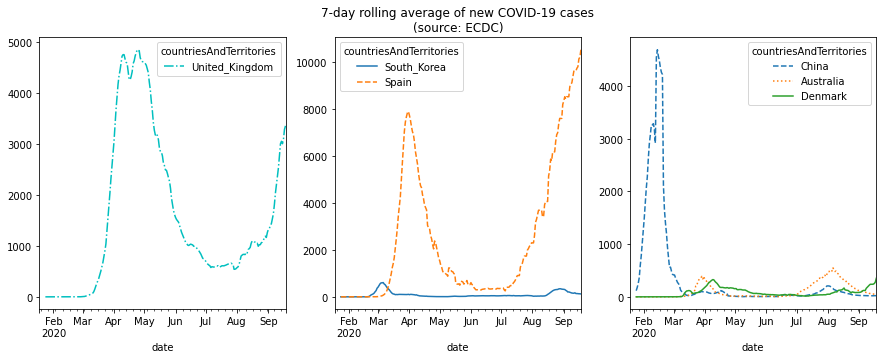

In [39]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

new_cases_rolling_average[['United_Kingdom']].plot(ax=axes[0], style='-.c')
new_cases_rolling_average[['South_Korea', 'Spain']].plot(
    ax=axes[1], style=['-', '--'], 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)
new_cases_rolling_average[['China', 'Australia', 'Denmark']]\
    .plot(ax=axes[2], style=['--', ':', '-'])

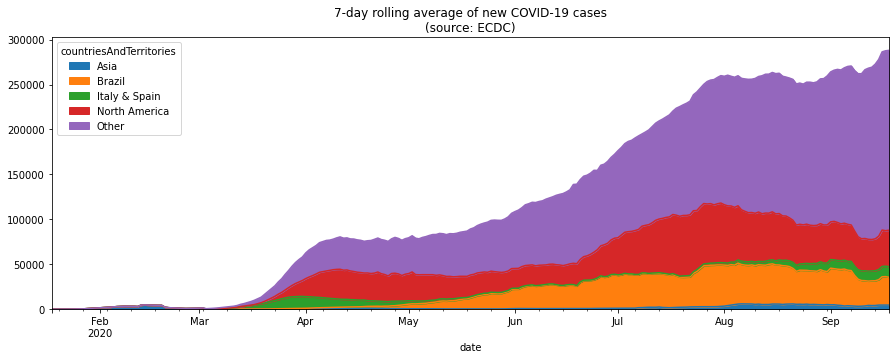

In [44]:
cols = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['North America', 'Brazil', 'Asia', 'Italy & Spain']
]

cols2 = [
    col for col in new_cases_rolling_average.columns 
    if col not in ['Canada', 'USA', 'Philippines', 'Japan', 'South_Korea', 'China', 'Brazil', 'Italy', 'Spain']
]

new_cases_rolling_average.assign(
    **{'Italy & Spain': lambda x: x.Italy + x.Spain},
    **{'North America': lambda x: x.Canada + x.USA},
    **{'Asia': lambda x: x.Philippines + x.Japan + x.South_Korea + x.China}
).sort_index(axis=1).assign(
    Other=lambda x: x[cols2].sum(axis=1)
).drop(columns=cols).plot(
    kind='area', figsize=(15, 5), 
    title='7-day rolling average of new COVID-19 cases\n(source: ECDC)'
)

# Task 3

## Stacked Bars Graph

Text(0, 0.5, 'count')

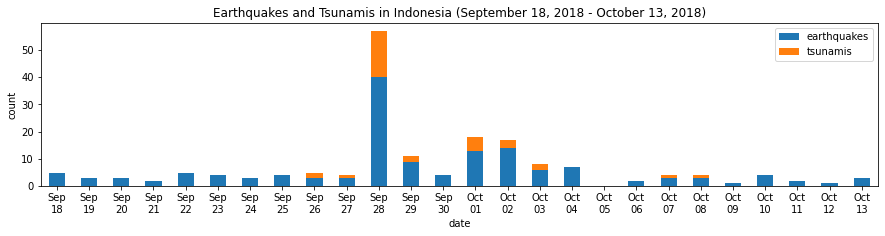

In [46]:
indonesia_quakes = quakes.query('parsed_place == "Indonesia"').assign(
    time=lambda x: pd.to_datetime(x.time, unit='ms'),
    earthquake=1
).set_index('time').resample('1D').sum()

# format the datetimes in the index for the x-axis
indonesia_quakes.index = indonesia_quakes.index.strftime('%b\n%d')

indonesia_quakes.plot.bar(
    y=['earthquake', 'tsunami'], figsize=(15, 3), 
    stacked=True,
    rot=0, label=['earthquakes', 'tsunamis'], 
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018)'
)

# label the axes (discussed in chapter 6)
plt.xlabel('date')
plt.ylabel('count')

## Normalized stacked bars graph

Text(0, 0.5, 'count')

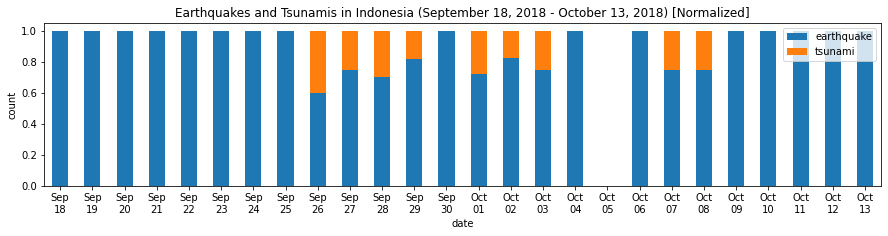

In [55]:
normalized = indonesia_quakes[['tsunami', 'earthquake']].fillna(0).apply(lambda x: x / x.sum(), axis=1)
ax = normalized.plot.bar(
    y=['earthquake', 'tsunami'],
    stacked=True, rot=0, figsize=(15, 3),
    title='Earthquakes and Tsunamis in Indonesia '
          '(September 18, 2018 - October 13, 2018) [Normalized]'
)
plt.xlabel('date')
plt.ylabel('count')